In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from tools import *

In [2]:
df = get_data('house_data_30min')
df_train, df_test = df[:-4], df[-4:]
df_test.tail()

,Ph,Te,Isol
t,,,
2013-02-08 13:05:00,42.0,2.253500,375.460368
2013-02-08 13:35:00,10.0,3.259167,751.789858
2013-02-08 14:05:00,30.0,2.946167,371.692539
2013-02-08 14:35:00,62.4,2.438000,134.627713


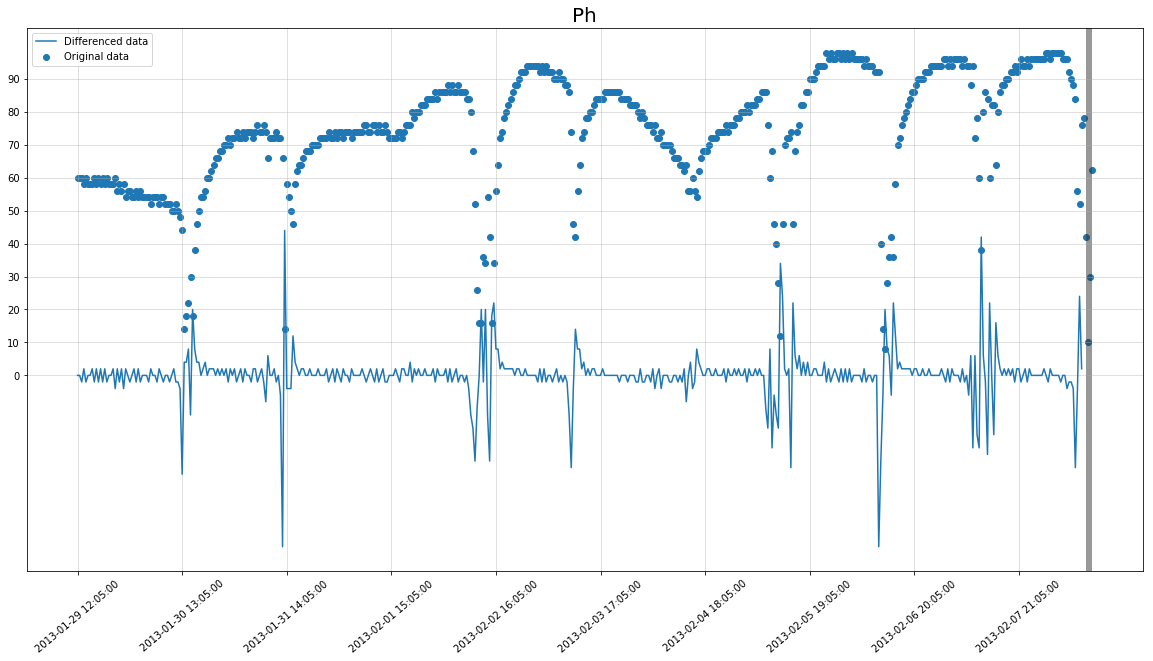

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df.index, df['Ph'], label='Original data')
# Major ticks every 20, minor ticks every 5
major_ticksx = np.arange(0, 500, 50)
major_ticksy = np.arange(0, 100, 10)


ax.set_xticks(major_ticksx)
ax.set_xticklabels(labels = df.index[0:500:50],rotation=40)
ax.set_yticks(major_ticksy)


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.axvspan(df_test.index[0], df_test.index[-1], facecolor='0.2', alpha=0.5)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Ph', fontsize=20)

plt.plot(df_train.index[:-1], np.diff(df_train['Ph'].values), label='Differenced data')
plt.legend()
plt.show()



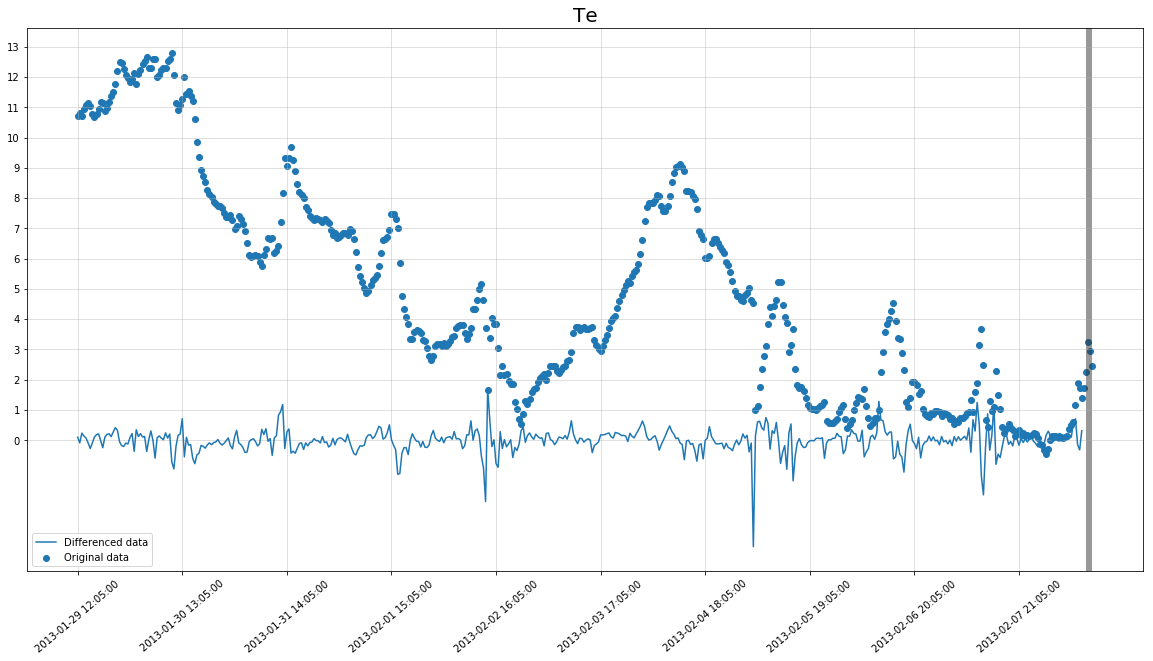

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df.index, df['Te'], label='Original data')
# Major ticks every 20, minor ticks every 5
major_ticksx = np.arange(0, 500, 50)
major_ticksy = np.arange(0, 15, 1)


ax.set_xticks(major_ticksx)
ax.set_xticklabels(labels = df.index[0:500:50],rotation=40)
ax.set_yticks(major_ticksy)


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.axvspan(df_test.index[0], df_test.index[-1], facecolor='0.2', alpha=0.5)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Te', fontsize=20)

plt.plot(df_train.index[:-1], np.diff(df_train['Te'].values), label='Differenced data')
plt.legend()
plt.show()

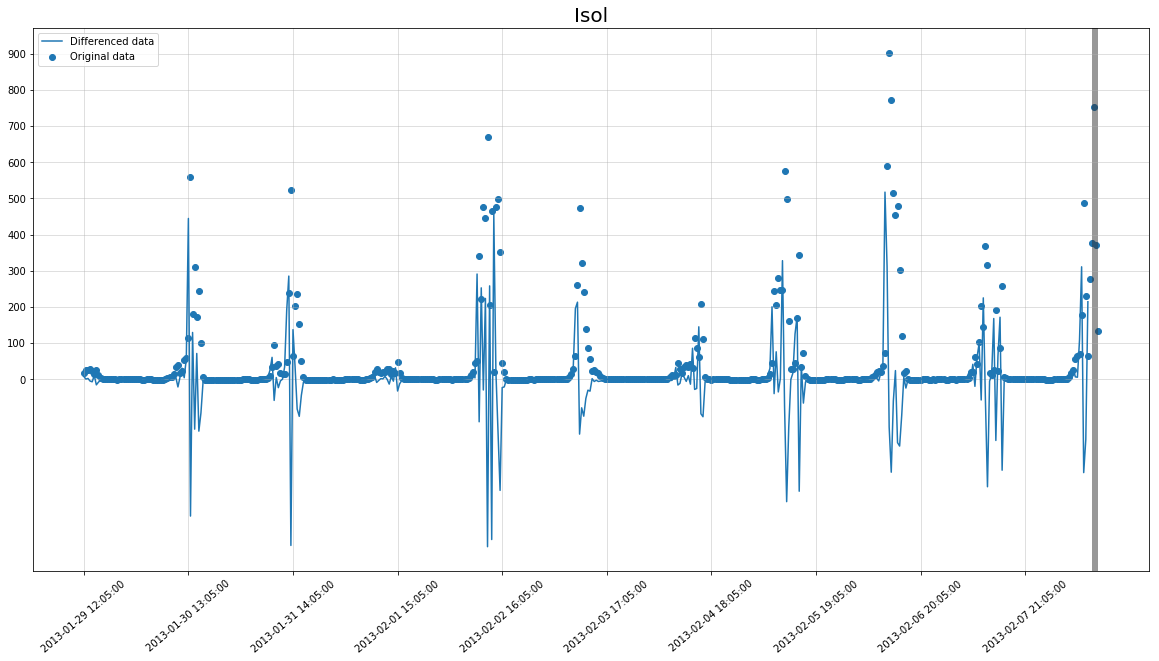

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df.index, df['Isol'], label='Original data')
# Major ticks every 20, minor ticks every 5
major_ticksx = np.arange(0, 500, 50)
major_ticksy = np.arange(0, 1000, 100)


ax.set_xticks(major_ticksx)
ax.set_xticklabels(labels = df.index[0:500:50],rotation=40)
ax.set_yticks(major_ticksy)


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.axvspan(df_test.index[0], df_test.index[-1], facecolor='0.2', alpha=0.5)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Isol', fontsize=20)

plt.plot(df_train.index[:-1], np.diff(df_train['Isol'].values), label='Differenced data')
plt.legend()
plt.show()

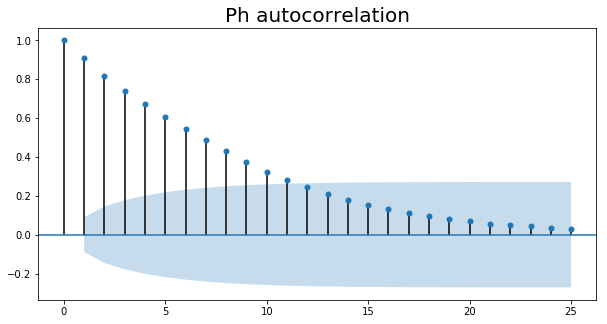

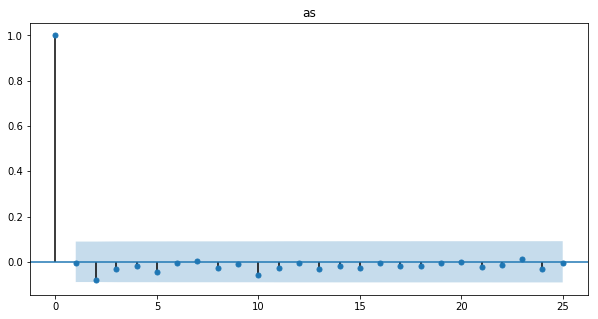

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams['figure.figsize'] = [10, 5]
plot_acf(df_train['Ph'], lags=25);
plt.title('Ph autocorrelation', fontsize =20)
plot_acf(np.diff(df_train['Ph'].values), lags=25, title='as');

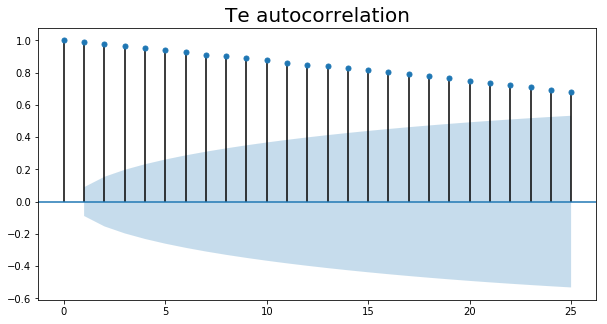

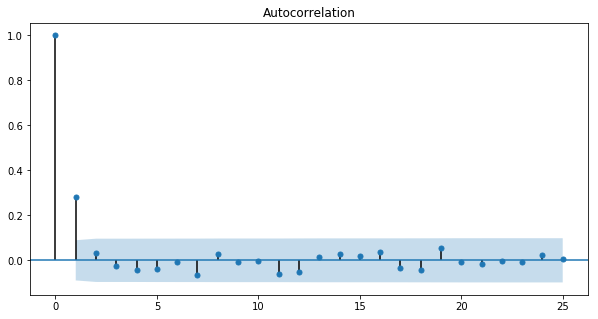

In [8]:
plot_acf((df_train['Te'].values), lags=25);
plt.title('Te autocorrelation', fontsize=20)
plot_acf(np.diff(df_train['Te'].values), lags=25);

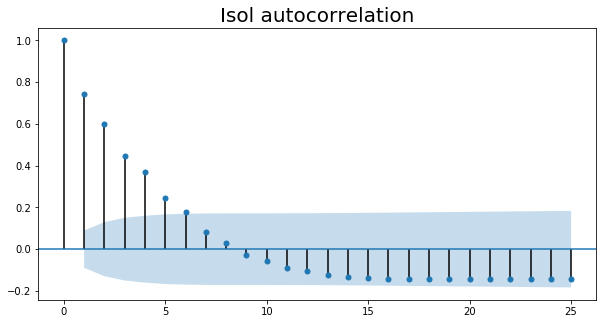

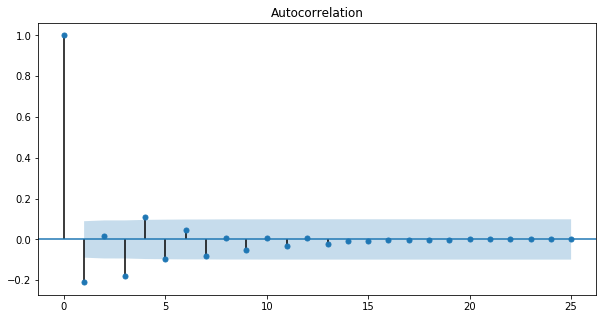

In [9]:
plot_acf((df_train['Isol'].values), lags=25);
plt.title('Isol autocorrelation', fontsize=20)
plot_acf(np.diff(df_train['Isol'].values), lags=25);

Text(0.5, 1.0, 'Ph vs Isol')

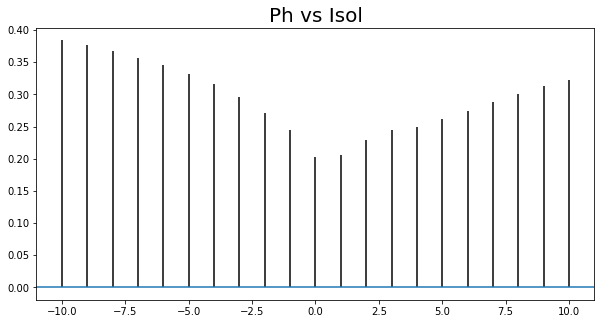

In [10]:
plt.xcorr(df_train['Ph'].values, df_train['Isol'].values)
plt.title('Ph vs Isol', fontsize =20)


Text(0.5, 1.0, 'Ph vs Te')

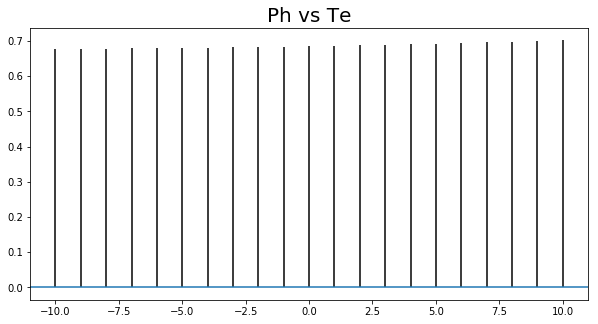

In [11]:
plt.xcorr(df_train['Ph'].values, df_train['Te'].values)
plt.title('Ph vs Te', fontsize =20)

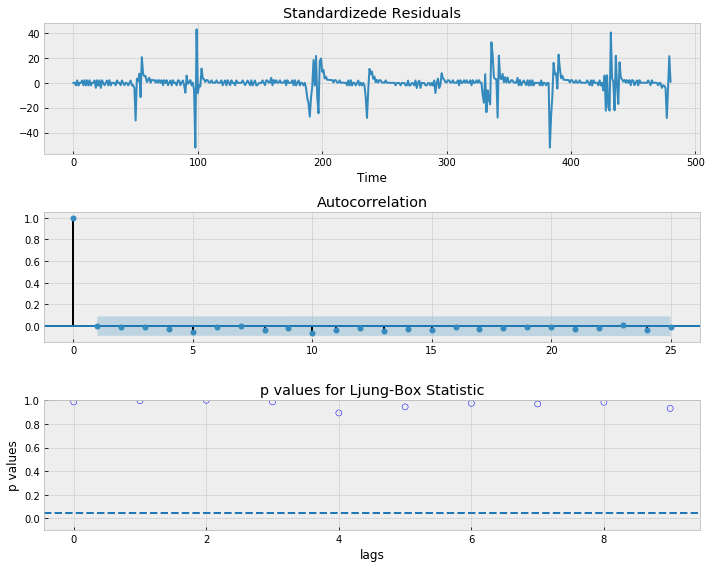

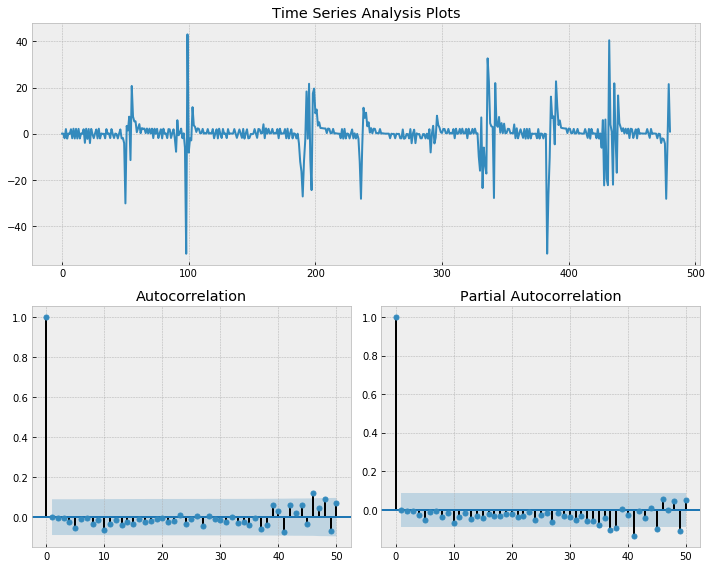

In [12]:
from  statsmodels.tsa.arima_model import ARIMA
from tools import *
model = ARIMA(df_train['Ph'].values, order = (3,1,0)).fit(method='mle', trend='nc')
# model = ARIMA(sim1, (1, 0, 1)).fit(method='mle', trend='nc')


tsdiag(model.resid)
plt.show()
tsplot(model.resid, lags=50)

# model.summary(alpha=0.05)
